<a href="https://colab.research.google.com/github/j4yb1rd/TractorProject/blob/main/Algorithm_polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def field_area(field):
  
  field.append(field[0])

  x, y = [], []
  area = 0

  for i in range(len(field)-1):
      x1 = field[i][0]
      x2 = field[i+1][0]
      y1 = field[i][1]
      y2 = field[i+1][1]
    
      area += (x1*y2 - y1*x2)/2
      area = abs(area)

  for i in field:
      x.append(i[0])
      y.append(i[1])

  return area, x, y

[3.07292983 0.98453243 0.94696551]
[0.46167293 0.3930101  0.59152233]


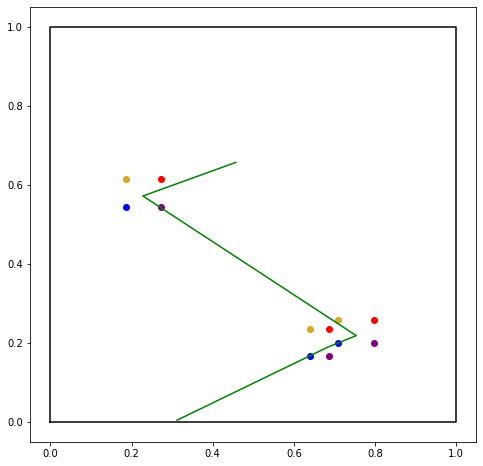

In [ ]:
field = [[0,0],[1,0],[1,1],[0,1]]
area, x, y = field_area(field)

ax = plt.figure(figsize = [8,8])
plt.plot(x,y, c='black')

width = 0.05
n = 5

x_list = np.random.random(size = n)
y_list = np.sort(np.random.random(size = n))

#x_list = [0, 0.5, 0.3333333333333, 0.675]
#y_list = [0.25, 0.25, 0.66666666666, 0.675]

def path_bound(x_list, y_list, width):
  x_path = np.array(x_list)
  y_path = np.array(y_list)

  #perpend_0 = -1 / ((y_path[1] - y_path[0]) / (x_path[1] - x_path[0]))
  

  #x_left = x_path + sign_p * width / np.sqrt(perpend**2 + 1)
  #x_right = x_path - sign_p * width / np.sqrt(perpend**2 + 1)
  #y_left = y_path - sign_p * perpend * width / np.sqrt(perpend**2 + 1)
  #y_right = y_path + sign_p * perpend * width / np.sqrt(perpend**2 + 1)

  x0, y0 = x_path[:-2], y_path[:-2]
  x1, y1 = x_path[1:-1], y_path[1:-1]
  x2, y2 = x_path[2:], y_path[2:]

  a = np.sqrt((y1-y0)**2+(x1-x0)**2)
  b = np.sqrt((y2-y1)**2+(x2-x1)**2)
  c = np.sqrt((y2-y0)**2+(x2-x0)**2)

  C = np.arccos((a**2+b**2-c**2)/(2*a*b))
  print(C)

  V = np.arcsin((y1-y0)/a)
  print(V)

  x_left = x1 + width * np.cos(C/2)
  y_left = y1 + width * np.sin(V+C/2)
  x_right = x1 - width * np.cos(V)
  y_right = y1 - width * np.sin(V)

  return x_left, y_left, x_right, y_right, x_path, y_path

x_left, y_left, x_right, y_right, x_path, y_path = path_bound(x_list, y_list, width)
#plt.scatter(x_left, y_left, c = 'r')
#plt.scatter(x_right, y_right, c = 'b')
#plt.plot(x_path, y_path, c='g')
#plt.show()

#print(x_left)
#print(x_right)
#print(y_left)
#print(y_right)
#print(x_path)
#print(y_path)

plt.plot(x_path, y_path, c='g')
plt.scatter(x_left, y_left, c='r')
plt.scatter(x_left, y_right, c='purple')
plt.scatter(x_right, y_right, c='b')
plt.scatter(x_right, y_left, c='goldenrod')

OK, so I think that with enough points and enough timestamps, the crude method above will work for what we need it to. Now I need to figure out how exactly to make polygons out of it.

There may also be a way to assign each of the points on the graph a timestamp as well when I get more tractor data.

Actually, this isn't even relevant to IPPM, but could be used in a formula for exact area determination in the future.

[0.43501117 2.48477341 2.3702698 ]
[-0.69643644  1.1314476   1.35332581]


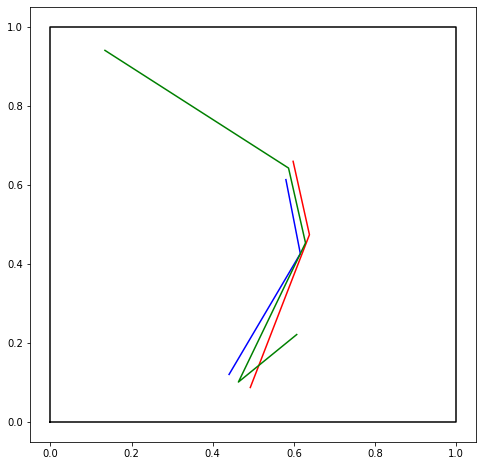

In [ ]:
field = [[0,0],[1,0],[1,1],[0,1]]
area, x, y = field_area(field)

ax = plt.figure(figsize = [8,8])
plt.plot(x,y, c='black')

width = 0.03
n = 5

x_list = np.random.random(size = n)
y_list = np.random.random(size = n)

def path_bound2(x_list, y_list, width):
  x_path = np.array(x_list)
  y_path = np.array(y_list)

  perpend = -1 / ((y_path[:-1] - y_path[1:]) / (x_path[:-1] - x_path[1:]))
  perpend = np.append(perpend, perpend[-1])
  sign_p = np.sign(perpend)

  x_left = x_path + sign_p * width / np.sqrt(perpend**2 + 1)
  x_right = x_path - sign_p * width / np.sqrt(perpend**2 + 1)
  y_left = y_path + sign_p * perpend * width / np.sqrt(perpend**2 + 1)
  y_right = y_path - sign_p * perpend * width / np.sqrt(perpend**2 + 1)

  #x0, y0 = x_path[:-2], y_path[:-2]
  #x1, y1 = x_path[1:-1], y_path[1:-1]
  #x2, y2 = x_path[2:], y_path[2:]

  #a = np.sqrt((y1-y0)**2+(x1-x0)**2)
  #b = np.sqrt((y2-y1)**2+(x2-x1)**2)
  #c = np.sqrt((y2-y0)**2+(x2-x0)**2)

 # C = np.arccos((a**2+b**2-c**2)/(2*a*b))
  #print(C)

  #V = np.arcsin((y1-y0)/a)
  #print(V)

  #x_left = x1 + width * np.cos(C/2)
  #y_left = y1 + width * np.sin(C/2)
  #x_right = x1 - width * np.cos(C/2)
  #y_right = y1 - width * np.sin(C/2)

  return x_left, y_left, x_right, y_right, x_path, y_path

x_left, y_left, x_right, y_right, x_path, y_path = path_bound(x_list, y_list, width)
plt.plot(x_left, y_left, c = 'r')
plt.plot(x_right, y_right, c = 'b')
plt.plot(x_path, y_path, c='g')
plt.show()

#print(x_left)
#print(x_right)
#print(y_left)
#print(y_right)
#print(x_path)
#print(y_path)

#plt.plot(x_path, y_path, c='g')
#plt.scatter(x_left, y_left, c='r')
#plt.scatter(x_left, y_right, c='purple')
#plt.scatter(x_right, y_right, c='b')
#plt.scatter(x_right, y_left, c='goldenrod')

In [ ]:
from pandas.tseries.frequencies import unique

def spray_tgaon(csv):

  df = pd.read_csv(csv)
  lat = df.iloc[:, 0]
  longtd = df.iloc[:, 1]
  heading = df.iloc[:, 7]

  #plt.plot(lat_long["Latitude"], lat_long["Longitude"])
  #print(lat_long)
  #print(heading)

  forspray = []
  PassNum = 1

  for i in range(len(heading)-1):
    if abs(heading[i+1] - heading[i]) > 35:
      PassNum += 1
      forspray.append(0)
    else: 
      forspray.append(PassNum)

  for i in range(len(forspray)-1):
    if forspray[i+1] == 0 and forspray[i-1] == 0:
      forspray[i] = 0

  forspray[-1] = 0
  polygon = np.unique(forspray)

  return forspray, polygon, lat, longtd, heading

[  0   1   4   5   6   8  11  12  14  15  16  19  20  21  22  26  27  28
  29  33  36  40  41  42  43  46  47  48  49  51  53  54  56  58  59  62
  63  65  66  67  68  69  71  72  73  74  75  79  81  82  85  86  89  90
  92  93  94  95  97  98  99 102 105 106 109 113 114 115 116 118 119 120
 123 125 126 127 128 129 133 134 137 141 145 147 148 149 150 151 155 157
 160 162]


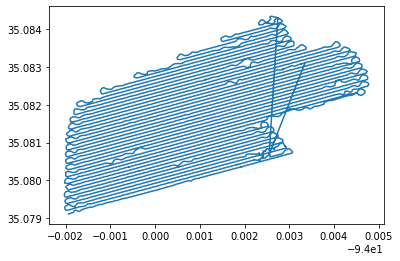

In [ ]:
forspray, polygon, lat, longtd, heading = spray_tgaon('/content/drive/MyDrive/Field_data/fertilizer18data/fert_p19_tgon.csv')

plt.plot(longtd, lat)
print(polygon)

In [ ]:
fwidth = 0.001
undef = 20
fx_left, fy_left, fx_right, fy_right, fx_path, fy_path = path_bound(lat[:-undef], longtd[:-undef], fwidth)

print(list(fy_left))

[2.67369145 2.97400727 2.52694954 ... 2.0418617  1.15816585 1.78126237]
[ 1.25728341  0.7893822   0.95696759 ...  1.12443423  0.02470328
 -1.18286912]
[-94.00133349686148, -94.00109027060367, -94.00102930203639, -94.00081367729261, -94.00089240371283, -94.00132027483252, -94.00113730179291, -94.00096845869841, -94.00070494770229, -94.00069815645325, -94.00120240988127, -94.00053957677265, -94.00221468640451, -94.00102977295613, -94.00098398290277, -94.00095991238263, -94.00102073210948, -94.00091093917125, -94.00087172411563, -94.00090456199653, -94.00063592003806, -94.00116194054534, -94.00098198893802, -94.00078481123944, -94.00069652072587, -94.00056168467748, -94.00078923282288, -94.00049647140051, -94.00044210870256, -94.00059308271891, -94.00038009788571, -94.00072510434995, -94.00057387908456, -94.00041561943142, -94.00043693526686, -94.00045449489383, -94.00028794929706, -94.00051492697636, -94.00038388879194, -94.00025832793895, -94.0002469384999, -94.00027611205311, -94.00031

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


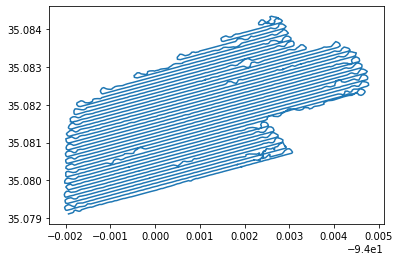

In [ ]:
plt.plot(fy_path, fx_path)